In [1]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [13]:
#環境配製
#這個號機車耶LOL
import random
import numpy as np
import pandas as pd
from math import e
from math import pow
from sklearn import datasets
import torch
import sklearn
DATA_PATH = './iris/'
from sklearn.model_selection import train_test_split #对数据集进行切分
from sklearn.naive_bayes import MultinomialNB  # 朴素贝叶斯网络模型

In [3]:
#圖形化數據
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [4]:
#數據幾導入
df = pd.read_csv(DATA_PATH + 'iris.csv')
trainSet = pd.read_csv(DATA_PATH + 'trainset.csv')
testSet = pd.read_csv(DATA_PATH + 'testset.csv')

In [14]:
#从样本构建特征集,载入特征和标签集.在进行机器学习之前，将数据集拆分为训练和测试数据集。
#首先，使用标签编码将 3 种鸢尾花的品种名称转换为分类值（0, 1, 2）
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = df['Species']
X1 = trainSet[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y1 = trainSet['Species']
X2 = testSet[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y2 = testSet['Species']

In [36]:
# 对标签集进行编码
encoder = LabelEncoder()
y = encoder.fit_transform(y)
#print(X,y)
type(X)

pandas.core.frame.DataFrame

In [10]:
# 对标签集进行编码
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)
print(y1)
type(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


numpy.ndarray

In [76]:
clf = sklearn.naive_bayes.MultinomialNB()  # 建立朴素贝叶斯网络.MultinomialNB()
clf.fit(X1, y1)  # 带入训练集训练模型
pre = clf.predict(X2)  # 预测测试集中特征矩阵所属的类别 进行预测
#y_pred=gns.predict(xtest)
# 导出预测概率
#y_prob=clf.predict_proba(X2)[:,1]
print(clf.predict_proba(X2)[:,1])
print(clf.predict_proba(X2)[:,2])
print(clf.predict_proba(X2))
#print(clf.class_prior_)
#print(clf.priors)
print(clf.class_count_)
#print(clf.theta_)
print(clf)
#print(clf.predict_proba(X2))
np.savetxt("./iris/result_all.csv", clf.predict_proba(X2), delimiter=',')
#同priors一样，都是获取各个类标记对应的先验概率，
#区别在于priors属性返回列表，class_prior_返回的是数组
type(y_prob)
#    class_prior   priors 
#np.savetxt("./iris/prob.csv", y_prob, delimiter=',')
#np.savetxt("./iris/result.csv", pre, delimiter=',')
#print('预测集标签')
#print(y2)
#print('预测结果',pre)
#print('数据格式',type(pre))

[0.16696936 0.26783847 0.18370044 0.2492316  0.21716863 0.21688551
 0.15538461 0.18883343 0.14963235 0.1734582  0.48955792 0.49787158
 0.49323353 0.47727058 0.4909283  0.49515932 0.49405174 0.49997297
 0.4727187  0.49312953 0.45669893 0.47439812 0.46364966 0.45989462
 0.45495308 0.46664274 0.46933268 0.47659063 0.46387228 0.47646131]
[0.09369333 0.177876   0.10908116 0.15299631 0.12607877 0.13163482
 0.08421675 0.11144836 0.08005987 0.09827764 0.46458651 0.45911355
 0.44174391 0.4225137  0.45892224 0.43534466 0.44849416 0.44110643
 0.40414987 0.44857954 0.53730706 0.51503481 0.52478213 0.53414423
 0.53960014 0.52452754 0.51840671 0.51046954 0.5274033  0.50720551]
[[0.73933731 0.16696936 0.09369333]
 [0.55428553 0.26783847 0.177876  ]
 [0.7072184  0.18370044 0.10908116]
 [0.59777209 0.2492316  0.15299631]
 [0.6567526  0.21716863 0.12607877]
 [0.65147966 0.21688551 0.13163482]
 [0.76039864 0.15538461 0.08421675]
 [0.69971822 0.18883343 0.11144836]
 [0.77030778 0.14963235 0.08005987]
 [0.

numpy.ndarray

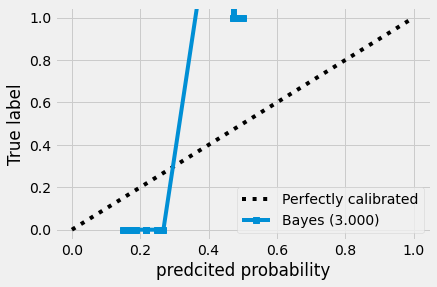

In [41]:
#在我们的横纵表坐标上，概率是由顺序的（由小到大），为了让图形规整一些，
#我们要先对预测概率和真实标签按照预测
#概率进行一个排序，这一点我们通过DataFrame来实现
df=pd.DataFrame({"ytrue":y2[:500],"probability":y_prob[:500]})
 
# 对df中的数据进行排序
df=df.sort_values(by="probability")
# 现在恢复我们的索引
df.index=range(df.shape[0])

fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],"s-",label="%s (%1.3f)" % ("Bayes", 3))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

from sklearn.calibration import calibration_curve
ytest = y2
# 分成10箱，ytest代表是真实标签，y_prob标示返回的概率
trueproba,predproba=calibration_curve(ytest,y_prob,n_bins=10)
# predproba代表每一个箱子中概率的均值
# trueproba代表每一个箱子中少数类的占比，均值
trueproba
# 我们要求分10个箱子，所以会返回10个数字
 
#紧接着我们就可以画图了
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(predproba,trueproba,"s-",label="%s (%1.3f)" % ("Bayes", 10))# 10代表是分10个箱子
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

In [19]:
print('GaussianNB Training Score: %.2f' % clf.score(X1, y1))
print('GaussianNB Testing Score: %.2f' % clf.score(X2, y2))
clf.get_params

GaussianNB Training Score: 0.94
GaussianNB Testing Score: 1.00


<bound method BaseEstimator.get_params of MultinomialNB()>

gns=GaussianNB()
gns=gns.fit(xtrain,ytrain)
#导出分类的结果
y_pred=gns.predict(xtest)
#出预测概率
y_prob=gns.predict_proba(xtest)[:,1]

#用于抄函数
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest) # 进行预测
cls = naive_bayes.GaussianNB()
    cls.fit(Train_X, Train_y)
     print('GaussianNB Training Score: %.2f' % cls.score(X_train, y_train))
    print('GaussianNB Testing Score: %.2f' % cls.score(X_test, y_test))